# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load the Breast Cancer dataset

In [2]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: Malignant, 1: Benign)
feature_names = data.feature_names
class_names = data.target_names

# Print dataset details
print(f"Dataset Shape: {X.shape}")
print(f"Class Distribution: {np.bincount(y)} (0: Malignant, 1: Benign)")

Dataset Shape: (569, 30)
Class Distribution: [212 357] (0: Malignant, 1: Benign)


# Visualizing Class Distribution

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8992\3705680191.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Malignant', 'Benign'], y=np.bincount(y), palette=['red', 'green'])


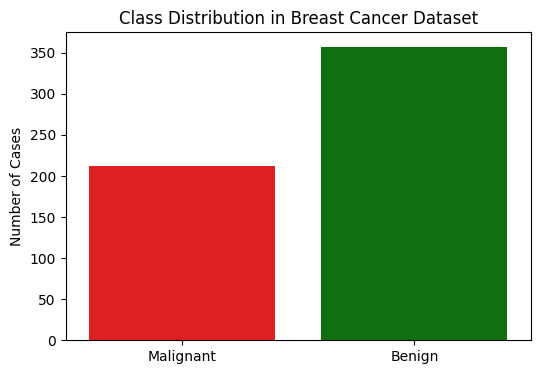

In [3]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Malignant', 'Benign'], y=np.bincount(y), palette=['red', 'green'])
plt.title("Class Distribution in Breast Cancer Dataset")
plt.ylabel("Number of Cases")
plt.show()

# Splitting dataset into Training and Testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

# Standardizing the dataset

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training KNN Classifier with k=10

In [6]:
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# Making predictions

In [7]:
y_pred = classifier.predict(X_test)

# Evaluating Model Performance

In [8]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the model: {round(accuracy, 2)}%")
print(f"Precision: {round(precision, 2)}")
print(f"Recall: {round(recall, 2)}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of the model: 96.49%
Precision: 0.94
Recall: 1.0

Confusion Matrix:
 [[44  4]
 [ 0 66]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        48
           1       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Visualizing Confusion Matrix

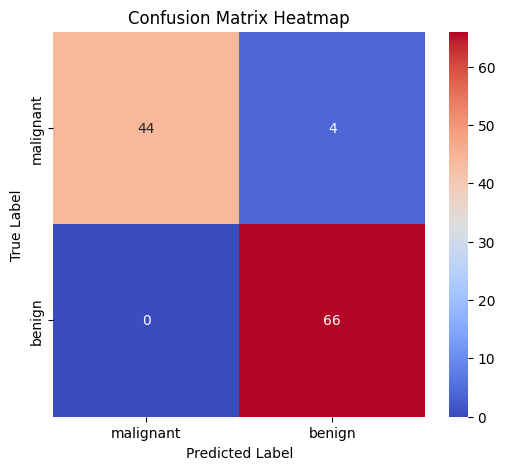

In [9]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Finding the Optimal K using Cross-Validation

In [10]:
k_list = list(range(1, 50))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting Misclassification Error vs K

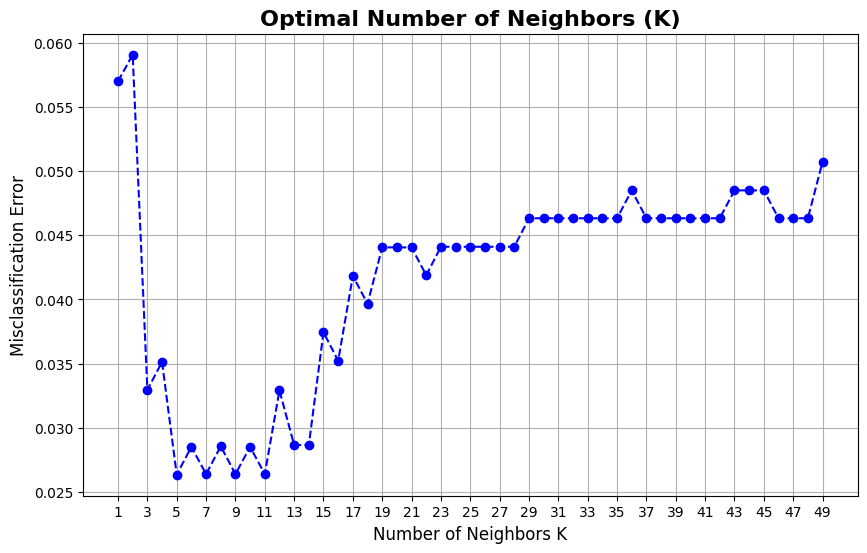

In [11]:
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(10, 6))
plt.title('Optimal Number of Neighbors (K)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=12)
plt.ylabel('Misclassification Error', fontsize=12)
plt.grid(True)
plt.plot(k_list, MSE, marker='o', linestyle='dashed', color='blue')
plt.xticks(range(1, 50, 2))
plt.show()

# Printing the best K value

In [12]:
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}.")

The optimal number of neighbors is 5.


# PCA for Feature Importance Visualization

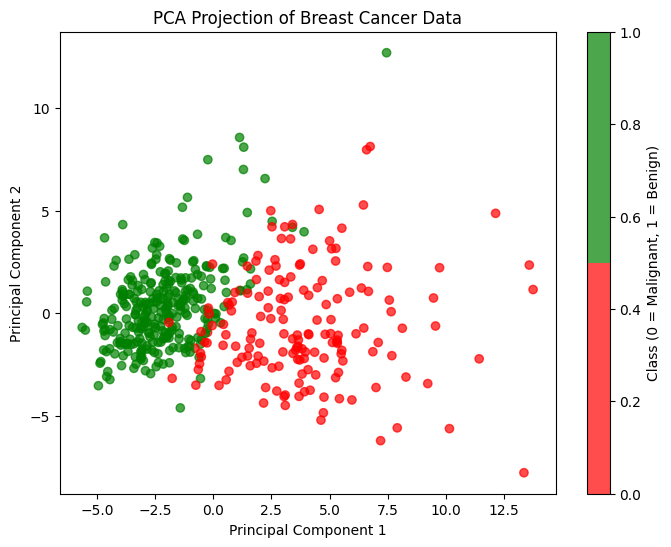

In [13]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=ListedColormap(['red', 'green']), alpha=0.7)
plt.title("PCA Projection of Breast Cancer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class (0 = Malignant, 1 = Benign)")
plt.show()
